In [6]:
import matplotlib.pyplot as plt
import pathlib
import numpy as np
import math
from utils import read_im, save_im, normalize
output_dir = pathlib.Path("image_solutions")
output_dir.mkdir(exist_ok=True)

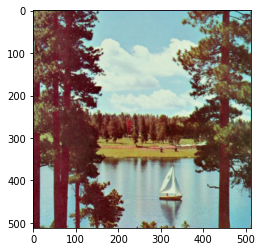

In [25]:
im = read_im(pathlib.Path("images", "lake.jpg"))
plt.imshow(im)

In [26]:
def convolve_im(im, kernel,
    ):
    """ A function that convolves im with kernel
    
    Args:
        im ([type]): [np.array of shape [H, W, 3]]
        kernel ([type]): [np.array of shape [K, K]]
    
    Returns:
        [type]: [np.array of shape [H, W, 3]. should be same as im]
    """
    assert len(im.shape) == 3

    print(im[256, 256, 0])
    print(im[256, 256, 1])
    print(im[256, 256, 2])

    kernel_size = math.floor(len(kernel)/2)
    
    img_x = len(im)
    img_y = len(im[0])

    for i in range(kernel_size, img_x - kernel_size - 1):
        for j in range(kernel_size, img_y - kernel_size - 1):
            if i == 0 or i == (len(im)-1) or j == 0 or j == (len(im[0])-1):
                im[i,j,0] = 0
                im[i,j,1] = 0
                im[i,j,2] = 0
            else:
                sum_0 = 0
                sum_1 = 0
                sum_2 = 0
                for x in range(-kernel_size, kernel_size):
                    for y in range(-kernel_size, kernel_size):
                        #print(im[i - kernel_size + x][j - kernel_size + y][0])
                        sum_0 += im[i - x][j - y][0] * kernel[x][y]
                        sum_1 += im[i - x][j - y][1] * kernel[x][y]
                        sum_2 += im[i - x][j - y][2] * kernel[x][y]
            
                im[i, j, 0] = sum_0
                im[i, j, 1] = sum_1
                im[i, j, 2] = sum_2

    return im

In [27]:
# Define the convolutional kernels
h_b = 1 / 256  * np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
])
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Convolve images
im_smoothed = convolve_im(im.copy(), h_b)
save_im(output_dir.joinpath("im_smoothed.jpg"), im_smoothed)
im_sobel = convolve_im(im, sobel_x)
save_im(output_dir.joinpath("im_sobel.jpg"), im_sobel)

# DO NOT CHANGE. Checking that your function returns as expected
assert isinstance(im_smoothed, np.ndarray),     f"Your convolve function has to return a np.array. " +    f"Was: {type(im_smoothed)}"
assert im_smoothed.shape == im.shape,     f"Expected smoothed im ({im_smoothed.shape}" +     f"to have same shape as im ({im.shape})"
assert im_sobel.shape == im.shape,     f"Expected smoothed im ({im_sobel.shape}" +     f"to have same shape as im ({im.shape})"

0.4627450980392157
0.2235294117647059
0.1411764705882353
0.4627450980392157
0.2235294117647059
0.1411764705882353


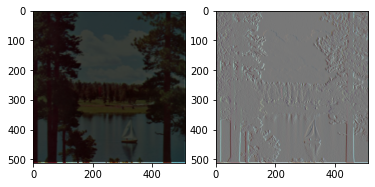

In [28]:
plt.subplot(1, 2, 1)
plt.imshow(normalize(im_smoothed))

plt.subplot(1, 2, 2)
plt.imshow(normalize(im_sobel))
plt.show()